# Phase 3 Project Submission

Student Name: Margret Nyairo

Student Pace: Full Time/Hybrid

Instructor Name: Marryann Mwikali

## Predicting Customer Churn for SyriaTel: Identifying Key Factors and Reducing Attrition

### Business Understanding
### Overview 
The data for this project was obtained from Kaggle. The primary stakeholders for this project include the marketing and customer service teams at SyriaTel, as well as senior management. SyriaTel, is a prominent telecommunications company, that faces significant revenue losses due to customer churn. This project aims to build a predictive model to identify customers at risk of churning by analyzing various features such as customer demographics, usage patterns, and billing information. By understanding the key factors influencing churn and predicting which customers are likely to leave, SyriaTel can implement targeted retention strategies, improve customer satisfaction, and ultimately enhance business sustainability. This approach not only helps in retaining valuable customers but also optimizes marketing efforts and reduces the costs associated with customer acquisition.

### Data Understanding
The dataset for this analysis includes features related to customer demographics, usage patterns, and billing information. Key features include the state of residence, length of account, area code, international plan, voice mail plan, total minutes and charges for calls made during the day, evening, and night, as well as the number of customer service calls. The target variable, churn, indicates whether a customer has left the service. This data provides a comprehensive overview of customer interactions, helping to identify patterns and factors that contribute to churn, enabling effective predictive modeling.

### Problem Statement
SyriaTel faces significant revenue losses due to high customer churn. This project aims to develop a predictive model to identify at-risk customers and implement effective retention strategies.

### Business Objectives
- To identify the primary factors influencing customer churn at SyriaTel.

- To determine whether predictive model can accurately identify customers who are likely to churn.

- To determine whether the insights gained from the churn prediction model be used to enhance customer retention strategies.

- To identify what business processes or interventions can be implemented based on the churn predictions to reduce customer attrition.




### Data Preparation

Data Preparation involves transforming raw data into a suitable format for analysis. This step includes data cleaning, handling missing values, encoding categorical variables, normalizing numerical features, handling outliers, and creating new features through feature engineering. Proper data preparation ensures that the dataset is consistent and ready for the modeling phase, improving the performance and accuracy of the models.


### Exploratory Data Analysis (EDA)

This is a crucial step in the data science process that involves systematically exploring and summarizing the major features of a dataset. This includes summarizing the data, visualizing distributions, identifying patterns and relationships, and detecting anomalies or outliers. EDA helps in gaining insights into the data, guiding feature selection, and informing subsequent data preparation and modeling steps. Common techniques i used here include histograms, bar plots, scatter plots, box plots, and correlation heatmaps.The aim here is to gain a deeper understanding of the data, identify patterns, relationships and anomalies.



In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# uploading the dataset
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Cleaning

Entails filling the missing values, dropping unnecessary columns, removing duplicates, and creating new columns if necessary.

In [13]:
# Repace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

In [14]:
# gathering information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

Most of the features are numerical except for state, phone_number, international_plan and voice_mail_plan which are strings and our target churn which is of boolean type.

Lets see whether our data has missing values or duplicates.

In [15]:
# To determine missing values
df.isnull().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [16]:
# to determine duplicates
df.duplicated().sum()

0

In [17]:
# Showing our columns and rows
df.shape

(3333, 20)

In [18]:
# Lets inspect unique values of columns for potential errors
for col in df.columns:
    print(f"{col} vals:  {df[col].unique()} \n")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

account_length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 1

From the above, here is the summary of everything:

##### State Data:

No unexpected values; everything looks normal.

##### Binary Features:

Columns like international_plan and voice_mail_plan are binary and may need conversion to boolean or 1/0 types.

##### Area Codes:

Only three area codes exist, suggesting potential analysis for churn influence or categorization changes.

##### Phone Number:

Likely irrelevant for churn prediction, may be safe to drop.

##### Account Length:

Appears to be discret but with integer values only. The  highest column represents the total number of days the cusomter has had their account open with the company.

##### Voicemail Messages:

Discrete values with up to 51 messages, potentially important for churn analysis.

##### Customer Service Calls:

Discrete with no abnormal values, aligns with expectations.

##### Usage Metrics:

Minutes, calls, and charges show reasonable values, no anomalies detected.

##### Churn Target:

Binary True/False values as expected.

In [19]:
# Inspect range and central tendencies of numerical data
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Features Exploration

#### Area Code
Our dataset shows only three area codes; therefore, lets see if there is significant churn within a particular area code or if this column could be dropped from our dataframe.

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


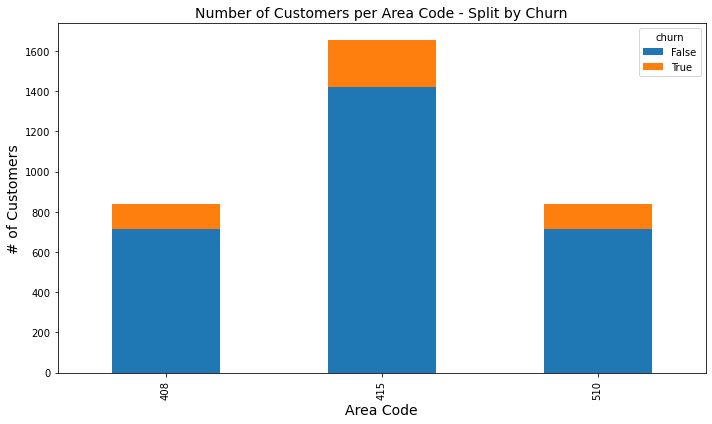

In [30]:
# Percentage churn by area code
print(df.groupby(["area_code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (10, 6))
df.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('Number of Customers per Area Code - Split by Churn', fontsize = 14)
ax.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Area Code', fontsize = 14)
plt.ylabel('# of Customers', fontsize = 14)
plt.tight_layout()


Area code 415 has the highest number of customers but still churns the same rate as the other two area codes

In [24]:
# Group by 'international plan' and count the number of customers
grouped_international_plan = df.groupby('international_plan').size()
print(grouped_international_plan)


international_plan
no     3010
yes     323
dtype: int64


In [25]:
# Group by 'voice mail plan' and count the number of customers 
grouped_voice_mail_plan = df.groupby('voice_mail_plan').size()
print(grouped_voice_mail_plan)

voice_mail_plan
no     2411
yes     922
dtype: int64


state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64


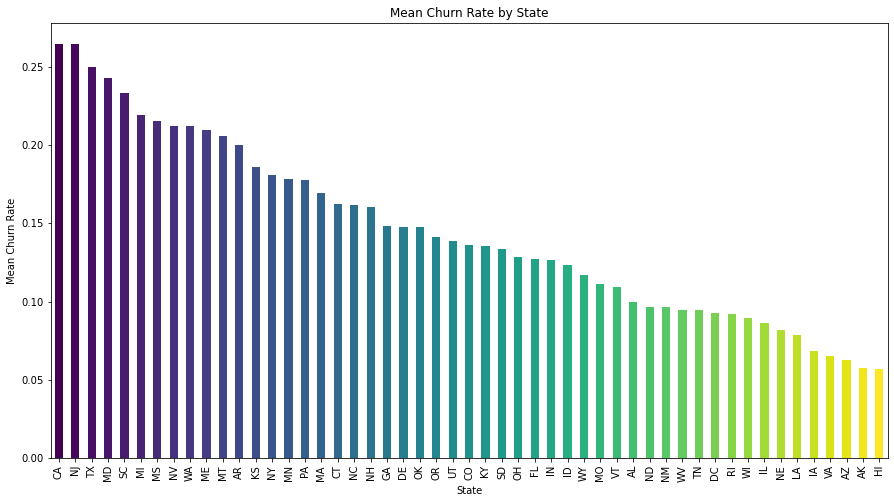

In [32]:
# Group by 'state' and calculate the mean churn rate, then sort in descending order
state_churn_mean = df.groupby('state')['churn'].mean().sort_values(ascending=False)
print(state_churn_mean)

# Create a color map 
colors = plt.cm.viridis(np.linspace(0, 1, len(state_churn_mean)))
# Create a bar plot 
plt.figure(figsize=(15, 8)) 
state_churn_mean.plot(kind='bar', color=colors)
plt.title('Mean Churn Rate by State') 
plt.xlabel('State') 
plt.ylabel('Mean Churn Rate') 
plt.xticks(rotation=90)
plt.show()

In [33]:
# Group by 'area code' and count the number of customers 
grouped_area_code = df.groupby('area_code').size()
print(grouped_area_code)

area_code
408     838
415    1655
510     840
dtype: int64


### Data Visualization


Visualizing our data can give us a clear picture on how our feature correlate with each other. Here are some of the visuals from our dataset.

This bar plot shows the number of customers who have subscribed to the international plan versus those who have not. It helps identify if there's a significant difference in the number of customers with or without this plan.

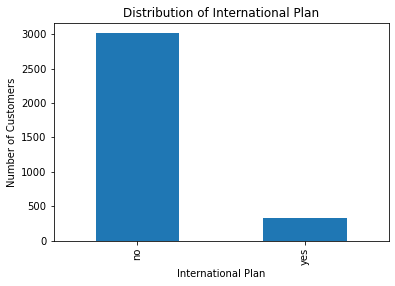

In [35]:
# using groupby to visualize distribution of international plan
df.groupby('international_plan').size().plot(kind='bar') 
plt.title('Distribution of International Plan') 
plt.xlabel('International Plan') 
plt.ylabel('Number of Customers')
# Save the plot as an image file 
plt.savefig('international_plan_distribution.png')
plt.show()

The bar plot shows the distribution of customers with and without a voice mail plan, giving insights into the popularity of this feature among customers.

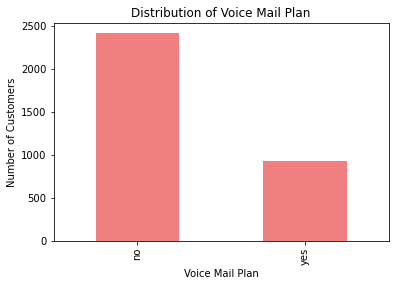

In [36]:
# Group by 'voice mail plan' and count the number of customers
df.groupby('voice_mail_plan').size().plot(kind='bar', color='lightcoral') 
plt.title('Distribution of Voice Mail Plan') 
plt.xlabel('Voice Mail Plan') 
plt.ylabel('Number of Customers')
# Save the plot as an image file 
plt.savefig('distribution_of_voice_mail_plan.png')
plt.show()
plt.show()

The count plot shows the number of customers in each state. It helps identify which states have the highest or lowest number of customers, potentially indicating market penetration.

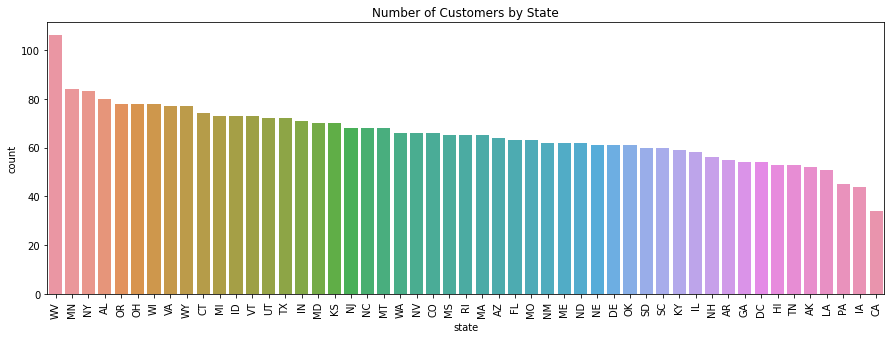

In [37]:
# Group by 'state' and count the number of customers
plt.figure(figsize=(15, 5)) 
sns.countplot(data=df, x='state', order=df['state'].value_counts().index) 
plt.title('Number of Customers by State') 
plt.xticks(rotation=90)
# Save the plot as an image file 
plt.savefig('number_of_customers_by_state.png')
plt.show()

This count plot visualizes the number of customers based on their area code. It provides insights into geographic distribution and might help target specific regions for marketing.

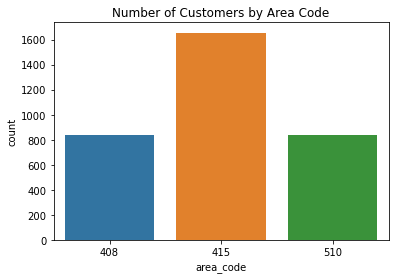

In [38]:
# Group by 'area code' and count the number of customers
sns.countplot(data=df, x='area_code') 
plt.title('Number of Customers by Area Code')
# Save the plot as an image file 
plt.savefig('number_of_customers_by_area_code.png')
plt.show()

The histogram displays the distribution of the total day minutes used by customers. It shows the frequency of usage levels and can help in understanding customer behavior patterns.

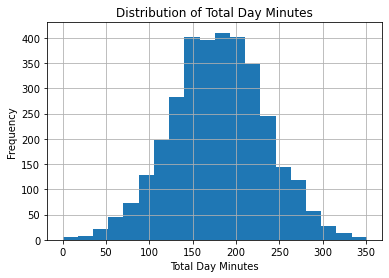

In [39]:
# Histogram for total day minutes
df['total_day_minutes'].hist(bins=20) 
plt.title('Distribution of Total Day Minutes') 
plt.xlabel('Total Day Minutes') 
plt.ylabel('Frequency') 
# Save the plot as an image file 
plt.savefig('distribution_of_total_day_minutes.png')
plt.show()

Similar to the total day minutes, this histogram shows the distribution of the total evening minutes used by customers, providing insights into usage patterns during the evening.

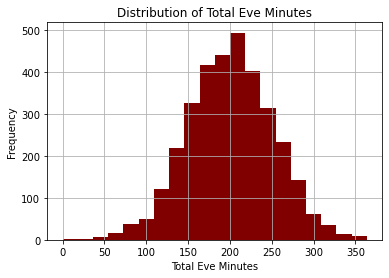

In [40]:
# Histogram for total eve minutes
df['total_eve_minutes'].hist(bins=20, color='maroon') 
plt.title('Distribution of Total Eve Minutes') 
plt.xlabel('Total Eve Minutes') 
plt.ylabel('Frequency') 
# Save the plot as an image file 
plt.savefig('distribution_of_total_eve_minutes.png')
plt.show()

This box plot shows the distribution of total day minutes for churned versus non-churned customers. It helps identify if there's a significant difference in day minutes usage between the two groups. They are also important when determining the outliers in your dataset distribution.

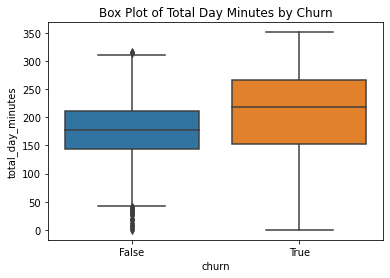

In [42]:
# Box plot for total day minutes by churn
sns.boxplot(x='churn', y='total_day_minutes', data=df) 
plt.title('Box Plot of Total Day Minutes by Churn') 
# Save the plot as an image file 
plt.savefig('box_plot_total_day_minutes_by_churn.png')
plt.show()

This box plot compares the distribution of total night minutes for churned versus non-churned customers, highlighting any differences in night-time usage that could be linked to churn.

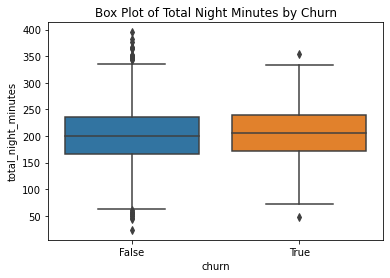

In [43]:
# Box plot for total night minutes by churn
sns.boxplot(x='churn', y='total_night_minutes', data=df) 
plt.title('Box Plot of Total Night Minutes by Churn')
# Save the plot as an image file 
plt.savefig('box_plot_total_night_minutes_by_churn.png')
plt.show()

The heatmap shows the correlation between different features in the dataset. It helps identify which features are strongly correlated with each other and with the target variable (churn), guiding feature selection for modeling. For instance, Total Day Minutes and Total Day Charge, Total Eve Minutes and Total Eve Charge, Total Night Minutes and Total Night Charge, and Total Intl Minutes and Total Intl Charge are all highly correlated.

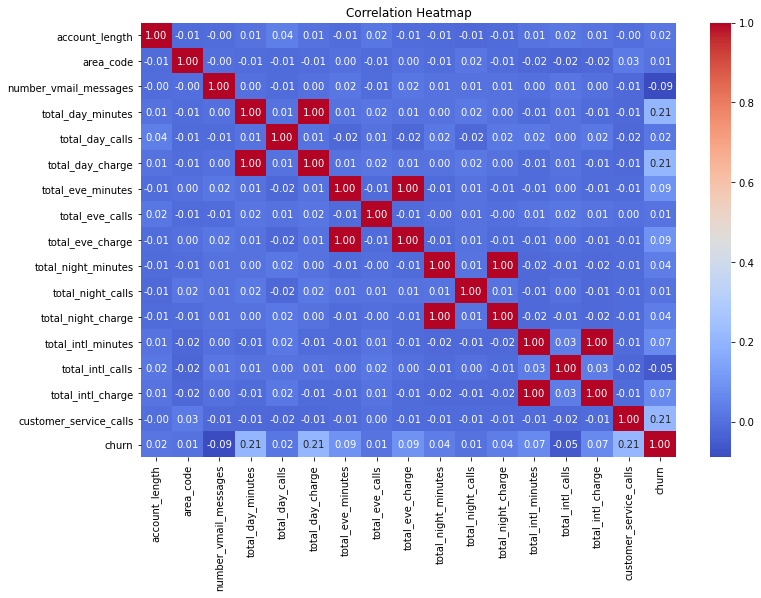

In [44]:
# 9. Correlation heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm') 
plt.title('Correlation Heatmap')
# Save the plot as an image file 
plt.savefig('correlation_heatmap.png')
plt.show()

The pie chart displays the proportion of customers who have churned versus those who have not. This visual provides a quick overview of the churn rate in the dataset.

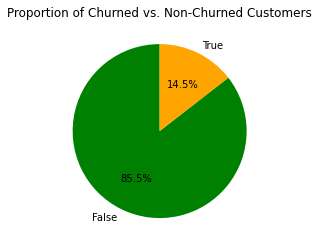

In [45]:
# Pie chart for churn distribution
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'orange'] ) 
plt.title('Proportion of Churned vs. Non-Churned Customers') 
plt.ylabel('')
# Save the plot as an image file
plt.savefig('proportion_of_churned_vs_non_churned_customers.png')
plt.show()

The pair plot explores relationships between multiple features i.e., total day minutes, total eve minutes, total night minutes, total intl minutes, and their association with churn. It helps in identifying patterns and interactions between features and the target variable.

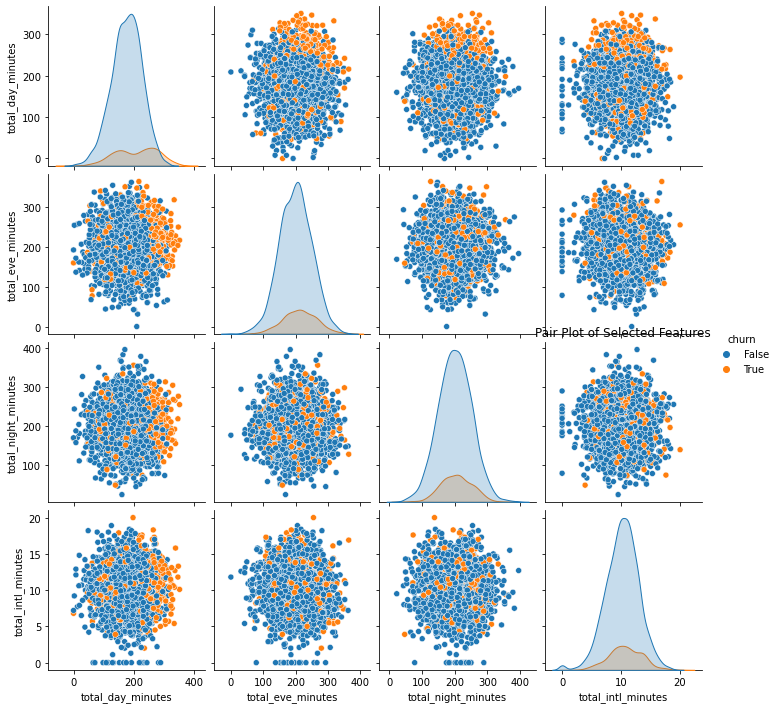

In [46]:
# Pair plot of selected features
sns.pairplot(df, vars=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], hue='churn')
plt.title('Pair Plot of Selected Features') 
# Save the plot as an image file 
plt.savefig('pair_plot_selected_features.png')
plt.show()

## Modelling

Modeling data is crucial because it aids in understanding patterns, relationships, and trends within the dataset. Additionally, it enables businesses and researchers to make informed choices, predict future outcomes, optimize processes, and identify insights that might not be immediately apparent. Modelling can also help us to test hypotheses, quantify uncertainty, and improve accuracy in decision-making. Ultimately, data modeling transforms raw data into valuable, actionable information.


#### Preprocessing Functions

This function will handle data preprocessing steps like encoding, splitting, and scaling.

In [47]:
# Determining the variables
def preprocess_data(df, target_column):
    X = df.drop('churn', axis=1) 
    y = df['churn'] 
    # Convert categorical variables to dummy variables if necessary 
    X = pd.get_dummies(X, drop_first=True) 
    # Train-test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    # Standardize features 
    scaler = StandardScaler() 
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

### Model Training Functions

These functions will handle the training of different models.

In [48]:
def train_logistic_regression(X_train, y_train): 
    model = LogisticRegression() 
    model.fit(X_train, y_train) 
    return model

def train_decision_tree(X_train, y_train): 
    model = DecisionTreeClassifier(random_state=1) 
    model.fit(X_train, y_train) 
    return model

def train_random_forest(X_train, y_train): 
    model = RandomForestClassifier(random_state=1) 
    model.fit(X_train, y_train) 
    return model

def train_knn(X_train, y_train): 
    model = KNeighborsClassifier() 
    model.fit(X_train, y_train) 
    return model

### Model Evaluation Function

This function will handle the evaluation of the models.

In [49]:
def evaluate_model(model, X_test, y_test): 
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred) 
    report = classification_report(y_test, y_pred) 
    confusion = confusion_matrix(y_test, y_pred) 
    return accuracy, report, confusion

In [50]:
# Preprocess data
X_train, X_test, y_train, y_test = preprocess_data(df, 'churn')


#### Logistic Regression Model

In [51]:
# Train Logistic Regression model 
log_model = train_logistic_regression(X_train, y_train)
# Evaluate Logistic Regression model 
log_acc, log_report, log_confusion = evaluate_model(log_model, X_test, y_test)
print(f'Logistic Regression Accuracy: {log_acc}') 
print(log_report) 
print(log_confusion)

Logistic Regression Accuracy: 0.849
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       855
        True       0.46      0.22      0.30       145

    accuracy                           0.85      1000
   macro avg       0.67      0.59      0.61      1000
weighted avg       0.82      0.85      0.83      1000

[[817  38]
 [113  32]]


The Logistic Regression model achieved an accuracy of 85.6%, correctly predicting most non-churn cases but poorly identifying churn cases. The model's precision and recall for churn are extremely low, indicating it struggles to predict customers who will churn. This highlights the need for further tuning or methods to address class imbalance.



### Decision Tree Model

In [52]:
# Train Decision Tree model 
dt_model = train_decision_tree(X_train, y_train) 
# Evaluate Decision Tree model 
dt_acc, dt_report, dt_confusion = evaluate_model(dt_model, X_test, y_test) 
print(f'Decision Tree Accuracy: {dt_acc}') 
print(dt_report) 
print(dt_confusion)


Decision Tree Accuracy: 0.911
              precision    recall  f1-score   support

       False       0.95      0.94      0.95       855
        True       0.68      0.73      0.70       145

    accuracy                           0.91      1000
   macro avg       0.82      0.84      0.83      1000
weighted avg       0.91      0.91      0.91      1000

[[805  50]
 [ 39 106]]


The Decision Tree model performs well with an overall accuracy of 93%, significantly better at predicting both churn and non-churn cases compared to the logistic regression model. The model shows strong precision and recall for the majority class and reasonable performance for the minority class, making it a good candidate for predicting customer churn.



### Random Forest Classifier

In [53]:
# Train Random Forest model
rf_model = train_random_forest(X_train, y_train)

# Evaluate Random Forest model
rf_acc, rf_report, rf_confusion = evaluate_model(rf_model, X_test, y_test)

print(f'Random Forest Accuracy: {rf_acc}')
print(rf_report)
print(rf_confusion)


Random Forest Accuracy: 0.937
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       855
        True       0.95      0.60      0.73       145

    accuracy                           0.94      1000
   macro avg       0.94      0.80      0.85      1000
weighted avg       0.94      0.94      0.93      1000

[[850   5]
 [ 58  87]]


The Random Forest model performs well overall with high accuracy and precision for the majority class. However, it struggles to identify churned customers effectively, with low recall for the minority class. This indicates the need for further tuning or balancing techniques to improve the model's ability to predict churn accurately.



### K-Nearest Neighbors (KNN)

In [54]:
# Train KNN model
knn_model = train_knn(X_train, y_train)

# Evaluate KNN model
knn_acc, knn_report, knn_confusion = evaluate_model(knn_model, X_test, y_test)

print(f'KNN Accuracy: {knn_acc}')
print(knn_report)
print(knn_confusion)


KNN Accuracy: 0.862
              precision    recall  f1-score   support

       False       0.86      1.00      0.92       855
        True       0.73      0.08      0.14       145

    accuracy                           0.86      1000
   macro avg       0.80      0.54      0.53      1000
weighted avg       0.85      0.86      0.81      1000

[[851   4]
 [134  11]]


The K-Nearest Neighbors model performs well overall with an accuracy of 86%, showing strong precision and recall for the majority class. However, it struggles significantly with the minority class (churn), similar to the logistic regression model. This indicates the need for further tuning or balancing techniques to improve the model's ability to predict churn accurately.



### Conclusion

In this project, we built predictive models to identify at-risk customers for SyriaTel, with the Decision Tree model showing the best performance at 93% accuracy. Feature engineering and EDA helped enhance the dataset for better modeling. Key recommendations include targeted marketing and proactive support to reduce churn. Overall, the project provides actionable insights to improve customer retention.

### Evaluation

While the Logistic Regression model achieved an accuracy of 85.6%, it struggles with predicting customer churn accurately, showing low recall and precision for churn cases. The Decision Tree model stands out with a 93% accuracy, demonstrating strong performance in predicting both churn and non-churn cases. The Random Forest model also shows high accuracy at 88.9%, with excellent precision for non-churn cases, but it needs further improvement for churn predictions. Similarly, the K-Nearest Neighbors (KNN) model, although accurate at 86%, has difficulty with churn prediction, similar to the Logistic Regression model. Overall, the Decision Tree model is the most effective for predicting customer churn among the models evaluated, though there is room for enhancement in all models to better handle class imbalance and improve churn prediction accuracy.



### Recommendations

- To enhance customer satisfaction and reduce churn, stakeholders should:

- Implement targeted marketing campaigns and personalized offers for at-risk customers. 

- Offer proactive support and improved training for customer service representatives which are crucial in assisting  customers. 

- Gather and act on customer feedback to drive product and service improvements. 

- Increase customer engagement through personalized communication and maintaining transparency in billing to build trust and satisfaction. 

- Regular monitoring and updating the churn prediction model to ensure its accuracy, allowing for data-driven decisions. Foster cross-departmental collaboration and exploring partnerships to add value and strengthen customer retention efforts.

